# CP1 Data Story
## By Logan Larson

Most of us are left to experience the world of professional sports from the outside, looking in, with no alternative but to compete in imaginary realms absent of any athletic barriers to entry. The baseball community realized this in the 1980s and ultimately devised a game within a game that could allow the average fan to get a taste of professional baseball. How it worked was generally straightforward: Participants took turns claiming individual athletes within the MLB before the season started, and as the season went on, whoever put together the most statistically productive team usually won.

Known today as "fantasy baseball," this imaginary game only gained popularity with time and  nowadays there exists a version of it for practically every major American sport. Based on 2017 year-end data from the Fantasy Sports and Gaming Association, roughly 60 million (roughly 21 percent) poeple in the American/Canadian population (age 12-plus) were estimated to have participated in some capacity in 2017.

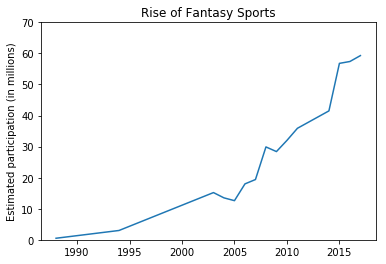

In [75]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import scipy as sp
import seaborn as sns
from six.moves import range



participation_data = pd.read_csv("fantasy_participation.csv")


plt.plot(participation_data['Year'], participation_data['Player_estimate']/1000000)
plt.ylim(0, 70)
plt.title("Rise of Fantasy Sports")
plt.ylabel("Estimated participation (in millions)")
plt.show()

Regardless of sport, the statistical production of any athlete always depends greatest on one factor: availability. The logic is intuitive in that an athlete must be available to compete in order to produce.

Therefore, paying attention to injuries is important for anyone particpating in a fantasy sport. And there may be no sport with less certainty around its players’ game-by-game availability than football in the National Football League, whose players, according to NFL Injury Analytics, have historically been about four times as likely to get injured in a practice or game than players in the NBA, MLB or NHL.

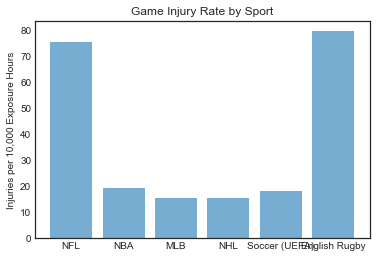

In [76]:
injury_data = pd.read_csv("injury_rates.csv")
o = injury_data['Sport']
y_pos = np.arange(len(o))
rate = injury_data['Injury_rate']

plt.bar(y_pos, rate, align='center', alpha=0.6)
plt.xticks(y_pos, o)

plt.title("Game Injury Rate by Sport")
plt.ylabel("Injuries per 10,000 Exposure Hours")
plt.show()

For a wide variety of reasons, recognizing the individual players that aren’t healthy enough to play can pose a significant advantage for the average fantasy football participant. Knowing which players are slated to benefit from that teammate’s absence is even more advantageous. Yet in either case, it’s always better to learn the information sooner than later — especially in high-stakes leagues with prize money at stake. The problem is that NFL teams have little incentive to provide the general public with perfectly accurate information on a real-time basis since that information could also provide a competitive advantage to its opponent. This often forces fantasy football participants to rely upon the media for injury-related information.

However, it usually isn’t enough to simply have the knowledge of these health updates since, again, there are instances when learning the updates only poses an advantage when you learn the information before your competition does. Therefore, a program that could analyze a credible news stream and alert players of injury updates — in real-time — would therefore be of significant utility to anyone who plays fantasy football. 

The most logical place to start building such a program is the Twitter feed of Adam Schefter, an award-winning NFL reporter who is widely considered the most credible NFL insider among the media. Collected and displayed below is a dataset of over 30,000 of his tweets 

In [71]:
df = pd.read_csv('clean_schefter_tweets3.csv')
del df['Unnamed: 0'] # get rid of unneeded column

In [62]:
df.head()

,DoW,Month,Day,Time,Year,Tweet,Timestamp,Date
0,Fri,Oct,27,18:58:04,2017,Here’s the article from @SethWickersham and @D...,2017-10-27 18:58:04,Oct 27 2017
1,Wed,Dec,19,18:23:26,2018,FOX analyst DeMarco Murray is considering taki...,2018-12-19 18:23:26,Dec 19 2018
2,Mon,Jan,4,19:09:57,2010,"For time being, Raiders coaches including HC T...",2010-01-04 19:09:57,Jan 04 2010
3,Tue,Sep,6,10:57:48,2016,"One of best days of year: OGBA draft at 630, f...",2016-09-06 10:57:48,Sep 06 2016
4,Mon,Jan,7,04:51:35,2013,Seahawks fear DE Chris Clemons tore his ACL an...,2013-01-07 04:51:35,Jan 07 2013


In [69]:
len(df)

33041

In [63]:
df['DoW'].value_counts()

Mon    5699
Sun    5124
Tue    4944
Wed    4812
Fri    4703
Thu    4580
Sat    3179
Name: DoW, dtype: int64

It's a slight surprise that he wasn't most active on Sundays, when the vast majority of NFL games are played, but its possible he's most active Monday because of extensive follow-ups on injuries that happened in the games the day before.

In [64]:
df['Month'].value_counts()

Mar    4167
Jan    3536
Sep    3395
Oct    3116
Apr    3033
Dec    3029
Nov    2908
Aug    2721
Jul    2024
Feb    1883
May    1750
Jun    1479
Name: Month, dtype: int64

It's also surprising he was most active in March because the NFL's regular season runs mid-September through December/early January.

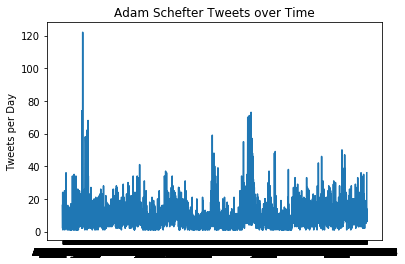

In [73]:
def count_elements(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(df['Date'])
lists = sorted(counted.items())

x, y = zip(*lists)

plt.title("Adam Schefter Tweets over Time")
plt.ylabel("Tweets per Day")
plt.plot(x, y)
plt.show()

In [67]:
# check out the anomaly

max(zip(counted.values(), counted.keys()))

(122, 'Apr 24 2010')

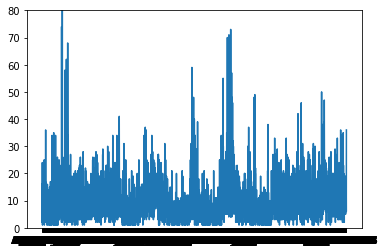

In [74]:
plt.ylim(0, 80, 10)
plt.title("Adam Schefter Tweets over Time")
plt.ylabel("Tweets per Day")
plt.plot(x, y)
plt.show()